[[-3.08231312e-06+0.j -8.95941610e-07+0.j  6.38263727e-07+0.j
  -3.90312782e-18+0.j -5.04154010e-18+0.j  6.50521303e-18+0.j]
 [-8.95941610e-07+0.j  5.88198219e-07+0.j -2.92292561e-06+0.j
  -1.05709712e-17+0.j  6.50521303e-18+0.j  1.30104261e-18+0.j]
 [ 6.38263727e-07+0.j -2.92292561e-06+0.j  2.62389281e-06+0.j
   4.33680869e-18+0.j -8.78203760e-18+0.j -2.81892565e-18+0.j]
 [ 5.09575021e-18+0.j  3.52365706e-18+0.j  1.13841228e-17+0.j
   5.38588701e-01+0.j -1.91258413e-01+0.j -5.93120849e-02+0.j]
 [-3.68628739e-18+0.j -4.77048956e-18+0.j  1.95156391e-18+0.j
  -1.91258413e-01+0.j  2.70979545e-01+0.j  7.06959226e-02+0.j]
 [ 3.48299948e-18+0.j  5.52943108e-18+0.j -3.30681663e-18+0.j
  -5.93120849e-02+0.j  7.06959226e-02+0.j  2.31434189e-01+0.j]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

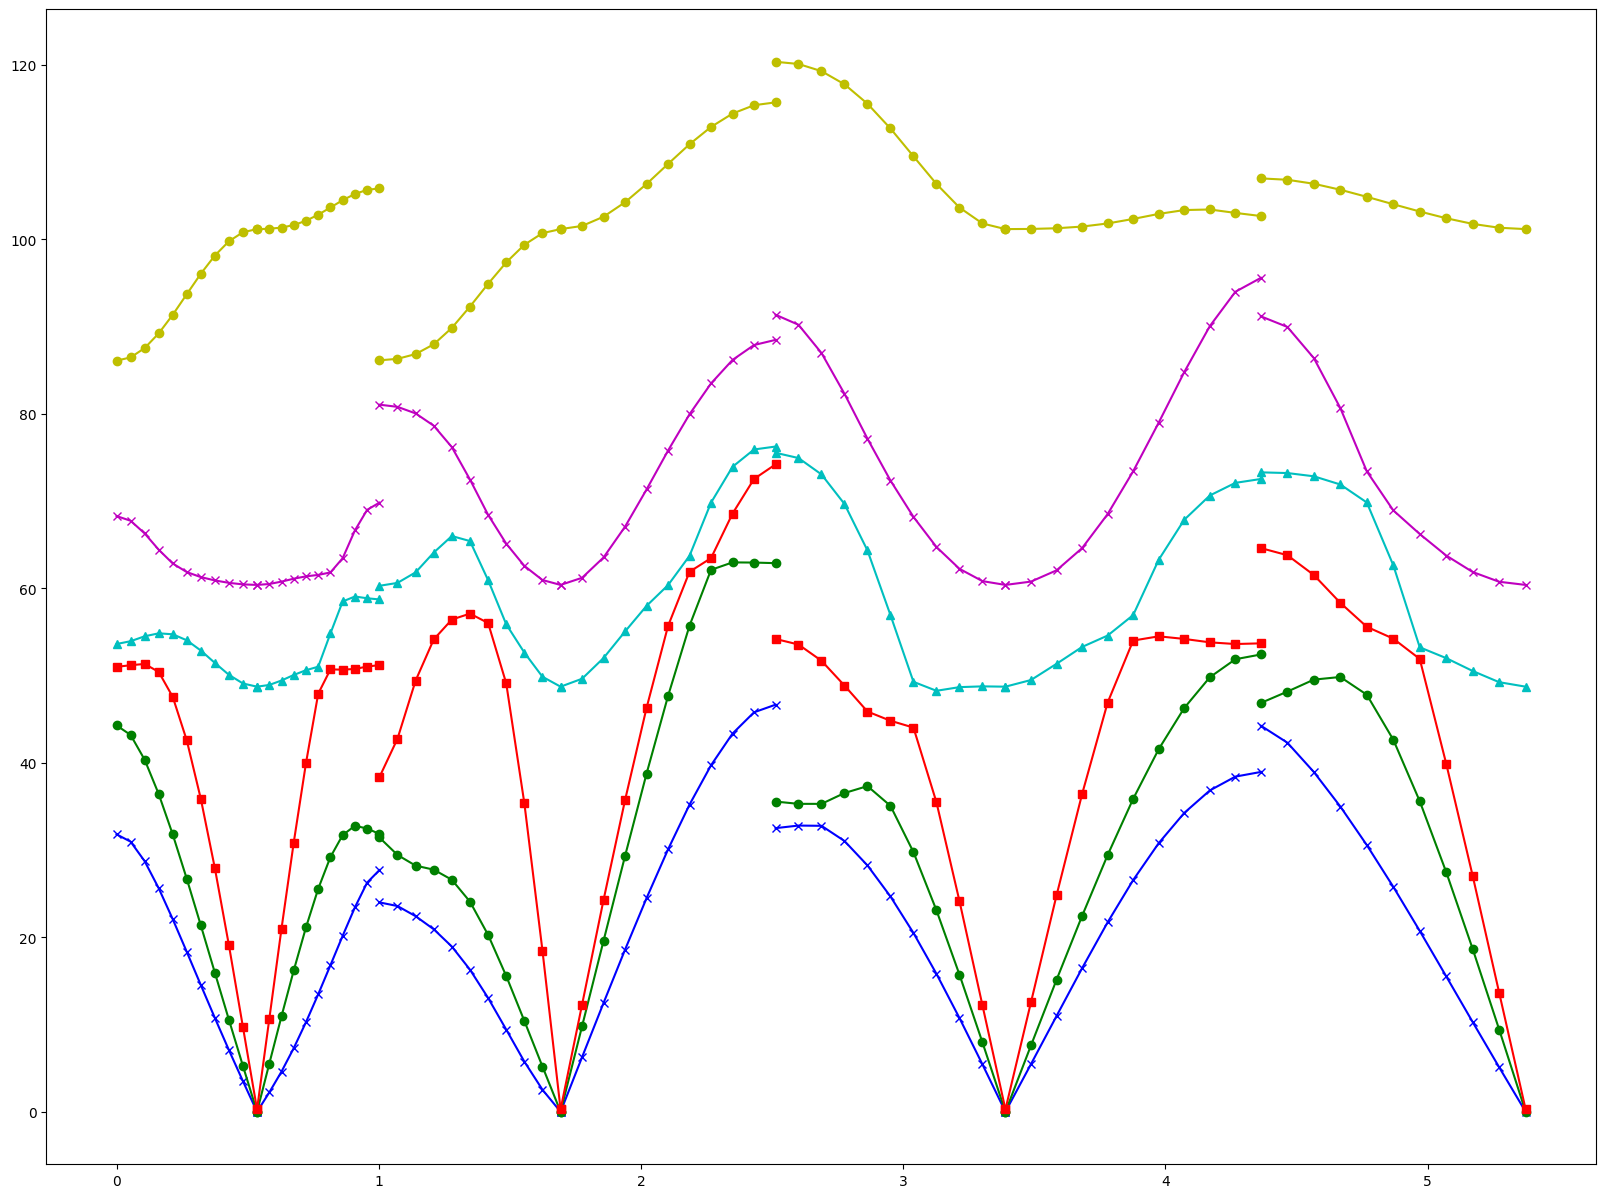

eigen values:
0.22668463836705743j
0.14884806434631254j
(0.27489788378338276+0j)
(48.731480879509164+0j)
(60.39619129390313+0j)
(101.1847507137358+0j)


In [1]:
import os,sys,math,cmath
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
from tkinter import ttk
from tkinter import messagebox as mbox
from tkinter import filedialog as fd
import pandas as pd

base_num=6
matD=np.empty((base_num,base_num),dtype=complex)
pi=np.pi 
i_num=1j 
sf=0.96
#lattice parameter
lattice_parameter_a=7.302
lattice_parameter_b=3.882
lattice_parameter_c=5.873
lattice_parameter_alpha=91.13
lattice_parameter_beta=92.43
lattice_parameter_gamma=112.55
Alpha = np.radians(lattice_parameter_alpha)
Beta = np.radians(lattice_parameter_beta)
Gamma = np.radians(lattice_parameter_gamma)

a1 = (lattice_parameter_a,0,0)
a2 = (lattice_parameter_b * np.cos(Gamma), lattice_parameter_b * np.sin(Gamma), 0)
a3 = (lattice_parameter_c * np.cos(Beta), lattice_parameter_c * ( np.cos(Alpha) - np.cos(Beta) * np.cos(Gamma)) / np.sin(Gamma), np.sqrt(np.sin(Gamma)**2-np.cos(Alpha)**2-np.cos(Beta)**2+2*np.cos(Alpha)*np.cos(Beta)*np.cos(Gamma))*lattice_parameter_c/np.sin(Gamma))


b1 = 2 * np.pi * np.cross(a2, a3) / np.dot(a1, np.cross(a2, a3))
b2 = 2 * np.pi * np.cross(a3, a1) / np.dot(a1, np.cross(a2, a3))
b3 = 2 * np.pi * np.cross(a1, a2) / np.dot(a1, np.cross(a2, a3))

kpoint_num=8 
route_num=4 
kpr1=3 
kpr2=3
kpr3=3
kpr4=2
kpr=np.array([kpr1,kpr2,kpr3,kpr4])
k_num=10

file_name="read.xlsx"

df_1=pd.read_excel(file_name, sheet_name='phi_3')  #调整输入表格，避免重复输入
df_5=pd.read_excel(file_name, sheet_name='gamma')
df_6=pd.read_excel(file_name, sheet_name='k-path')
df_1=df_1.fillna(0)
df_5=df_5.fillna(0)
df_6=df_6.fillna(0)

def FBZ_jugde(k1,k2,k3):
    vectors = [b1,b2,b3,-b1,-b2,-b3,b1+b2,b1+b3,b2+b3,b1-b2,b1-b3,b2-b3,b2-b1,b3-b1,b3-b2,-b1-b2,-b1-b3,-b2-b3,b1+b2+b3,b1+b2-b3,b1-b2+b3,-b1+b2+b3,b1-b2-b3,-b1+b2-b3,-b1-b2+b3,-b1-b2-b3]
    for i in range(len(vectors)):
        if np.dot(k1*b1+k2*b2+k3*b3,vectors[i])>0.5*np.dot(vectors[i],vectors[i]):
            return False
        return True
#phi matrix put in 
n=0
for i in range(0,27):
    exec("matK"+str(26-i)+"=np.array(df_1.iloc[n:n+base_num,6:6+base_num],dtype=complex)")
    n=n+14

#gamma matrix put in
n=0
for i in range(0,27):
    exec("matG"+str(26-i)+"=np.array(df_1.iloc[n:n+base_num,20:20+base_num],dtype=complex)")
    n=n+14

#k-path coordinate put in 
for i in range(1,route_num+1):
    exec("matR"+str(i)+"=np.array(df_6.iloc[0:kpr"+str(i)+",7+5*(i-1):11+5*(i-1)],dtype=complex)")

matG=np.array(df_5.iloc[0:base_num,0:base_num],dtype=complex)

list_eigen=[[[0] * (k_num+1) for i in range(max(kpr1,kpr2,kpr3,kpr4))] for j in range(route_num)]

for r in range(0, route_num):
    exec("matR=matR"+str(r+1)+"")
    for p in range(0, kpr[r]-1):
        for k in range(0, k_num+1):
            a_i=(2*pi*(k/k_num*(matR[p+1,0]-matR[p,0])+matR[p,0]))*i_num
            b_i=(2*pi*(k/k_num*(matR[p+1,1]-matR[p,1])+matR[p,1]))*i_num
            c_i=(2*pi*(k/k_num*(matR[p+1,2]-matR[p,2])+matR[p,2]))*i_num
            
            matK=np.zeros((base_num,base_num),dtype=complex)
            
            
            for a in range(-1,2):
                for b in range(-1,2):
                    for c in range(-1,2):
                        n=(a+1)*9+(b+1)*3+c+1
                        #exec("matK"+str(n)+"=np.dot(np.dot(matG"+str(n)+",matK"+str(n)+"),matG"+str(n)+".T)")
                        #exec("matD=np.dot(matG,matK"+str(n)+")")
                        #exec("matK"+str(n)+"=np.dot(matD,matG.T)")
                        exec("matK+=np.dot(np.dot(matG"+str(n)+",matK"+str(n)+"*cmath.exp(a*a_i+b*b_i+c*c_i)),matG"+str(n)+".T)")
                        #exec("matK+=matK"+str(n)+"*cmath.exp(a*a_i+b*b_i+c*c_i)")
            
            #exec("matD=np.dot(matG13,matK)")
            #exec("matK=np.dot(matD,matG13.T)")

            if(r==0):
                if(p==1):
                    if(k==0):
                        #print(str(kx)+", "+str(ky)+", "+str(kz))
                        print(matK)
                        
                        

            l,P=np.linalg.eig(matK)

            l=np.sort(l,axis=0)
            v=np.transpose(P)

            list_eigen[r][p][k]=l.tolist()

y=[[[[0.0+0j]*(k_num+1) for k in range(base_num)] for i in range(max(kpr1,kpr2,kpr3,kpr4))] for j in range(route_num)]
for r in range(0,route_num):
    for p in range(0, kpr[r]-1):
        for value in range(0,base_num): #value 震动模式的序列
            for k in range(0,k_num+1):
                y[r][p][value][k]=list_eigen[r][p][k][value]

np_eigen=np.array(y,dtype=complex)

plt.clf()

plt.figure(figsize=(20,15))
x1=0
#计算各个高对称点之间的步长，以此给x赋值。
for r in range(0,route_num):
    exec("matR=matR"+str(r+1)+"")
    for p in range(0, kpr[r]-1):
        s=matR[p+1,3]
        x=np.array([x1,x1+0.1*s,x1+0.2*s,x1+0.3*s,x1+0.4*s,x1+0.5*s,x1+0.6*s,x1+0.7*s,x1+0.8*s,x1+0.9*s,x1+s])
        x1=x1+s
        
        plt.plot(x,sf*np.sqrt(np_eigen[r][p][0]/0.000059),color='b',marker='x')
        plt.plot(x,sf*np.sqrt(np_eigen[r][p][1]/0.000059),'g-o')
        plt.plot(x,sf*np.sqrt(np_eigen[r][p][2]/0.000059),'r-s')
        plt.plot(x,sf*np.sqrt(np_eigen[r][p][3]/0.000059),'c-^')
        plt.plot(x,sf*np.sqrt(np_eigen[r][p][4]/0.000059),'m-x')
        plt.plot(x,sf*np.sqrt(np_eigen[r][p][5]/0.000059),'y-o')
        #plt.plot(x,np.sqrt(np_eigen[r][p][6]/0.000059),'b-s') 根据计算base数需要进行调整
        #plt.plot(x,np.sqrt(np_eigen[r][p][7]/0.000059),'g-^')
        #plt.plot(x,np.sqrt(np_eigen[r][p][8]/0.000059),'r-x')
        #plt.plot(x,np.sqrt(np_eigen[r][p][9]/0.000059),'c-o')
        #plt.plot(x,np.sqrt(np_eigen[r][p][10]/0.000059),'m-s')
        #plt.plot(x,np.sqrt(np_eigen[r][p][11]/0.000059),'y-^')

plt.show()

print("eigen values:")
print(sf*np.sqrt(np_eigen[0][1][0][0]/0.000059))
print(sf*np.sqrt(np_eigen[0][1][1][0]/0.000059))
print(sf*np.sqrt(np_eigen[0][1][2][0]/0.000059))
print(sf*np.sqrt(np_eigen[0][1][3][0]/0.000059))
print(sf*np.sqrt(np_eigen[0][1][4][0]/0.000059))
print(sf*np.sqrt(np_eigen[0][1][5][0]/0.000059))


In [4]:
#DOS计算模块：由4分之一FBZ的统计得到，整体应该分为计算部分和能量分拣部分。
#计算区间的判断为各个方向（逆向量）的极值（循环范围）和数个不等式（判断语句）组成。

s=0.01
#b1=0.933074978328598
#b2=1.07162048621218
#b3=1.75386677814264
B1=np.linalg.norm(b1)
B2=np.linalg.norm(b2)
B3=np.linalg.norm(b3)

list_eigenfbz=[[[0] * (math.floor(B3/s)) for i in range(math.floor(B2/s))] for j in range(math.floor(B3/s))]

for m1 in range(0,math.floor(B1/s)):#取值范围由高对称点中对应坐标的极值决定（系数乘以模长），下方的判断语句由解决不等式问题得到
    M1=m1-math.floor(B1/s)/2
    for m2 in range(0,math.floor(B2/s)):
        M2=m2-math.floor(B2/s)/2
        for m3 in range(0,math.floor(B3/s)):
                M3=m3-math.floor(B3/s)/2
                a_i=(2*pi*M1*s/B1)*i_num
                b_i=(2*pi*M2*s/B2)*i_num
                c_i=(2*pi*M3*s/B3)*i_num
                matK=np.zeros((base_num,base_num),dtype=complex)

                for a in range(-1,2):
                    for b in range(-1,2):
                        for c in range(-1,2):
                            n=(a+1)*9+(b+1)*3+c+1
                            #exec("matK+=np.dot(np.dot(matG"+str(n)+",matK"+str(n)+"*cmath.exp(a*a_i+b*b_i+c*c_i)),matG"+str(n)+".T)")
                            exec("matK+=np.dot(np.dot(matG"+str(n)+",matK"+str(n)+"*cmath.exp(a*a_i+b*b_i+c*c_i)),matG"+str(n)+".T)")

                l,P=np.linalg.eig(matK)

                l=np.sort(l,axis=0)
                v=np.transpose(P)

                list_eigenfbz[m1][m2][m3]=l.tolist()

z=[[[[0.0+0j]*(base_num) for i in range(math.floor(B3/s))] for j in range(math.floor(B2/s))] for k in range(math.floor(B1/s))]
for m1 in range(0,math.floor(B1/s)):
    for m2 in range(0,math.floor(B2/s)):
        for m3 in range(0,math.floor(B3/s)):
            for value in range(0,6):
                    z[m1][m2][m3][value]=list_eigenfbz[m1][m2][m3][value]

np_eigenfbz=np.array(z,dtype=complex)                
H_frequency=150

plt.clf()
plt.figure(figsize=(5,15))
N=0 #计算的点的总数
se=1 #step_length_of_energy
w=[0]*H_frequency
for x in range(0,H_frequency):#范围由声子谱范围决定
    n=0
    for m1 in range(math.floor(B1/s)):#取值范围由高对称点中对应坐标的极值决定（系数乘以模长），下方的判断语句由解决不等式问题得到
        for m2 in range(math.floor(B2/s)):
            for m3 in range(math.floor(B3/s)):
                for value in range(0,base_num):
                    if FBZ_jugde((m1-math.floor(B1/s)/2)*s/B1,(m2-math.floor(B2/s)/2)*s/B2,(m3-math.floor(B2/s)*s/B3))==True:
                        if x<=np.real(sf*np.sqrt(np_eigenfbz[m1][m2][m3][value]/0.000059))<x+1:
                            n=n+1
    N=N+n
    w[x]=n
for x in range(0,H_frequency):
    plt.barh(x,w[x]*base_num/(N*se),color='c')

plt.show()
                         

In [18]:
for x in range(0,150):
    print(x,w[x]*base_num/(N*se))


0 1.8481363277762183e-05
1 9.009664597909065e-05
2 0.0002090704220796847
3 0.0003696272655552437
4 0.0005879383692738095
5 0.0008189554102458368
6 0.0010465071956032837
7 0.0014195997167731078
8 0.001674873547047198
9 0.002091859306001707
10 0.0024926738720881746
11 0.002902729119813523
12 0.0033197148787680324
13 0.0038371930505453735
14 0.004382393267239358
15 0.004865218882870895
16 0.0054785691266516275
17 0.006103470222480961
18 0.006727216233105435
19 0.007536930961712391
20 0.008102922712093858
21 0.008953065422870918
22 0.009718886913693188
23 0.01074691274601871
24 0.011540456281757623
25 0.012667819441701117
26 0.013575716412721185
27 0.014815122837536112
28 0.016113438607798906
29 0.017403668781627676
30 0.018863696480570888
31 0.02056398190212501
32 0.022474492830963675
33 0.024510908047132098
34 0.027454065149115723
35 0.03135594297113327
36 0.03572216504550458
37 0.039480812302119465
38 0.04003525320045233
39 0.04153686396677051
40 0.04171936742913841
41 0.043439289299175